In [1]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
students = pd.read_csv('students.csv')
task01 = pd.read_csv('task01.csv')
task02 = pd.read_csv('task2.csv')
task03 = pd.read_csv('task3.csv')
task04 = pd.read_csv('task4.csv')

students

,studID,name
0,1,paul patrylo
1,2,denys lukianchuk
2,3,max boyko


In [3]:
data = pd.merge(students,task01,on='studID',how='inner')
data = data.merge(task02,on='studID',how='inner')
data = data.merge(task03,on='studID',how='inner')
data = data.merge(task04,on='studID',how='inner')
display(data)

,studID,name,task1,task2,task3,task4
0,1,paul patrylo,10,20,11,40
1,2,denys lukianchuk,20,10,25,30
2,3,max boyko,15,10,20,10


In [4]:
data['total'] = data['task1'] + data['task2'] + data['task3'] + data['task4']
display(data)

,studID,name,task1,task2,task3,task4,total
0,1,paul patrylo,10,20,11,40,81
1,2,denys lukianchuk,20,10,25,30,85
2,3,max boyko,15,10,20,10,55


In [5]:
wd = widgets.Dropdown(
    options=data.columns[2:],  # Всі колонки, окрім 'Student'
    description = 'Student:',
    disabled = False,
)

def show(value):
    if value in data.columns:  # Перевіряємо, чи існує обрана колонка
        ranked_data = data[['name', value]].sort_values(by=value, ascending=False)
        ranked_data['Rank'] = range(1, len(ranked_data) + 1)  # Додаємо місце у рейтингу
        display(ranked_data)

widget = widgets.interactive(show,value=wd)

display(widget)

interactive(children=(Dropdown(description='Student:', options=('task1', 'task2', 'task3', 'task4', 'total'), …

In [6]:
wd1 = widgets.Dropdown(
    options=data.columns[2:],  # Всі колонки, окрім 'Student'
    description = 'Student:',
    disabled = False,
)
def show_graph(value):
    if value in data.columns: 
        plt.bar(data['name'],data[value],color='green')
        plt.xlabel('Students')
        plt.ylabel('Mark')
        plt.title(f'Mark distribution for {value}')
        plt.show()
widget1 = widgets.interactive(show_graph,value=wd1)
display(widget1)

interactive(children=(Dropdown(description='Student:', options=('task1', 'task2', 'task3', 'task4', 'total'), …

In [7]:
wd2 = widgets.Dropdown(
    options=data.columns[2:],  # Всі колонки, окрім 'Student'
    description = 'Student:',
    disabled = False,
)
def average_mark(value):
    if value in data.columns: 
        result = data[value].sum()
        result = result / len(data['name'])
        display(result)
widget2 = widgets.interactive(average_mark,value=wd2)
display(widget2)

interactive(children=(Dropdown(description='Student:', options=('task1', 'task2', 'task3', 'task4', 'total'), …

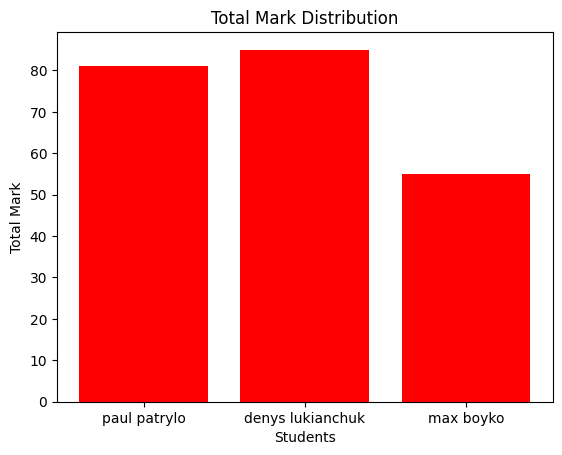

In [8]:
def total_graph():
    plt.bar(data['name'],data['total'],color='red')
    plt.xlabel('Students')
    plt.ylabel('Total Mark')
    plt.title('Total Mark Distribution')
    plt.show()
total_graph()

In [9]:
def bologne():
    
    data.loc[data['total']>90,'bologne'] = 'A'
    data.loc[(data['total']>80) & (data['total']<=90),'bologne'] = 'B'
    data.loc[(data['total']>70) & (data['total']<=80),'bologne'] = 'C'
    data.loc[(data['total']>60) & (data['total']<=70),'bologne'] = 'D'
    data.loc[(data['total']>50) & (data['total']<=60),'bologne'] = 'E'
    data.loc[data['total']<=50,'bologne'] = 'F'

    display(data)

bologne()

,studID,name,task1,task2,task3,task4,total,bologne
0,1,paul patrylo,10,20,11,40,81,B
1,2,denys lukianchuk,20,10,25,30,85,B
2,3,max boyko,15,10,20,10,55,E


In [10]:
wd3 = widgets.Dropdown(
    options=data['bologne'].unique(),
    description = 'Bologne:',
    disabled = False,
)

def show_bologne(value):
    if value in data['bologne'].values:
        filtred = data[data['bologne'] == value]
        if not filtred.empty:
            result = filtred[['name','total']]
            result = result.sort_values(by='total', ascending=False)
            display(result)
        else:
            print(f'Немає студента з оцінкою {data[value]}')
widget3 = widgets.interactive(show_bologne, value=wd3)
display(widget3)

interactive(children=(Dropdown(description='Bologne:', options=('B', 'E'), value='B'), Output()), _dom_classes…

In [11]:
filtered_row = data.loc[data['name'] == 'paul patrylo', data.columns[2:6]]
test = filtered_row.max(axis=1).values[0]

display(filtered_row)
display(test.item())

,task1,task2,task3,task4
0,10,20,11,40


40

In [12]:
wd4 = widgets.Dropdown(
    options=data['name'],
    description = 'Student:',
    disabled = False,
)
def min_max(value):
    if value in data['name'].values:
        filtered = data[data['name'] == value]
        if not filtered.empty:
            result = filtered[['task1','task2','task3','task4']]
            min_value = result.min(axis=1).values[0]
            min_column = filtered_row.idxmin(axis=1).values[0]
            max_value = result.max(axis=1).values[0]
            max_column = filtered_row.idxmax(axis=1).values[0]

            display(f'Мінімальна оцінка: {min_value} за завдання: {min_column}, Максимальна оцінка: {max_value}, за завдання: {max_column}')
        else:
            print(f'Немає студента з iменем {value}')

widget4 = widgets.interactive(min_max, value=wd4)

display(widget4)


interactive(children=(Dropdown(description='Student:', options=('paul patrylo', 'denys lukianchuk', 'max boyko…

In [18]:
df = pd.read_csv('task01.csv')

class Task:
    def __init__(self, id, mark):
        self._id = id
        self._mark = mark

    @property
    def id(self):
        return self._id

    @id.setter
    def id(self, value):
        self._id = value

    @property
    def mark(self):
        return self._mark

    @mark.setter
    def mark(self, value):
        if 0 <= value <= 100:
            self._mark = value
        else:
            raise ValueError('Mark must be between 0 and 100.')

# Створення об'єктів Task
task = [Task(row['studID'], row['task1']) for _, row in df.iterrows()]

# Виведення результатів
for t in task:
    print(f'ID: {t.id}, Mark: {t.mark}')

ID: 1, Mark: 10
ID: 2, Mark: 20
ID: 3, Mark: 15


In [17]:
import unittest

class TestTask(unittest.TestCase):
    def setUp(self):
        self.task = Task(1, 90)

    def test_invalid_mark(self):
        with self.assertRaises(ValueError):
            self.task.mark = -1


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK
